<a href="https://colab.research.google.com/github/cutiips/Master-Thesis/blob/main/Master_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Station of Neuchâtel

Station : NEU (Neuchâtel), precipitation *dataset* `rre150d0`

Daily total precipitation, from 6 UTC to 6 UTC (next day)

Temporal coverage: 31.12.1863 - 31.12.2023

Homogenized data: 1864 – 2010

Displayed data: 1864 - 2023


In [ ]:
# Packages for data processing
install.packages("dplyr")
library(dplyr)

install.packages("ggplot2")
library(ggplot2)

install.packages("zoo")
library(zoo)

In [5]:
# Preprocessing
url <- "https://raw.githubusercontent.com/cutiips/Master-Thesis/main/NEU_rre150d0.txt"
NEU_P <- read.table(url, header = TRUE, as.is = FALSE, sep = ";")

colnames(NEU_P)[2] <- "date"
colnames(NEU_P)[3] <- "precip"

NEU_P$date <- as.Date(as.character(NEU_P$date), format = "%Y%m%d")
NEU_P$year <- format(NEU_P$date, "%Y")
NEU_P$month <- format(NEU_P$date, "%m")
NEU_P$Year <- as.numeric(NEU_P$year)
NEU_P$month <- as.numeric(NEU_P$month)
NEU_P$precip <- as.numeric(NEU_P$precip)

In [6]:
# Check for missing values
sum(is.na(NEU_P))

[1] 0

## R10mm

Annual count of days with precipitation ≥ 10 mm


Call:
lm(formula = Count_R10mm_NEU ~ Year, data = R10mm_summary_NEU)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.1021  -5.6912  -0.6331   5.4354  23.7746 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 17.940667  24.772071   0.724    0.470
Year         0.006851   0.012743   0.538    0.592

Residual standard error: 7.445 on 158 degrees of freedom
Multiple R-squared:  0.001826,	Adjusted R-squared:  -0.004491 
F-statistic: 0.2891 on 1 and 158 DF,  p-value: 0.5916


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


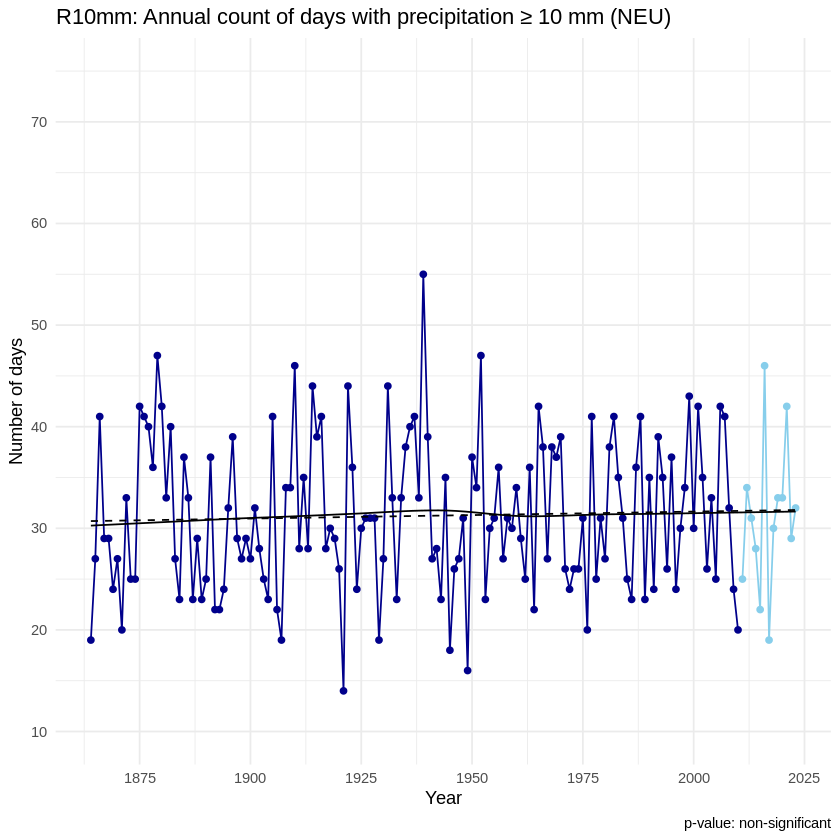

In [11]:
R10mm_days_NEU <- NEU_P[NEU_P$precip >= 10, ]
R10mm_summary_NEU <- aggregate(R10mm_days_NEU$precip,
  by = list(Year = R10mm_days_NEU$year), FUN = length)
colnames(R10mm_summary_NEU)[2] <- "Count_R10mm_NEU"
R10mm_summary_NEU$Year <- as.numeric(R10mm_summary_NEU$Year)

# Linear trend analysis (based on all availible data)
model_R10mm_NEU <- lm(Count_R10mm_NEU ~ Year, data = R10mm_summary_NEU)
summary(model_R10mm_NEU)

# Data homogenization period (NEU) : 1864 to 2010
R10mm_summary_NEU$Dataset <- ifelse(R10mm_summary_NEU$Year <= 2010,
                                    "homogenized","non-homogenized")
R10mm_homog_NEU <- R10mm_summary_NEU[R10mm_summary_NEU$Dataset == "homogenized", ]

# Graph with data homogenization period
ggplot(R10mm_summary_NEU, aes(x = Year, y = Count_R10mm_NEU)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "R10mm: Annual count of days with precipitation ≥ 10 mm (NEU)",
  x = "Year",y = "Number of days",
  caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(10, 75), breaks = seq(10, 75, by = 10)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none")

# Summary statistics (homogenized data only)
  #Mean
mean_R10mm_homog_NEU <- mean(R10mm_homog_NEU$Count_R10mm_NEU, na.rm = TRUE)

  #Usual range
range_R10mm_homog_NEU <- quantile(R10mm_homog_NEU$Count_R10mm,
  probs = c(0.05, 0.95), na.rm = TRUE)